In [98]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [99]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [101]:
# Determine number of rows and columns
df.shape

(30021, 13)

In [102]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


In [103]:
#Determine the distribution of the data in the geography column 
local_counts = df.geography.value_counts()
local_counts

Plains                  556
Indianapolis            556
New York                556
Seattle                 556
Dallas/Ft. Worth        556
Pittsburgh              556
Louisville              556
Charlotte               556
Cincinnati/Dayton       556
Northeast               556
Orlando                 556
Baltimore/Washington    556
Houston                 556
Columbus                556
Grand Rapids            556
Boise                   556
Northern New England    556
South Carolina          556
Los Angeles             556
Richmond/Norfolk        556
Philadelphia            556
West                    556
Miami/Ft. Lauderdale    556
Tampa                   556
Roanoke                 556
San Diego               556
Albany                  556
Southeast               556
Chicago                 556
San Francisco           556
California              556
Jacksonville            556
Portland                556
Buffalo/Rochester       556
New Orleans/Mobile      556
Nashville           

In [104]:
#Determine the features of the training set by seeing the correlations to each column
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915
year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000


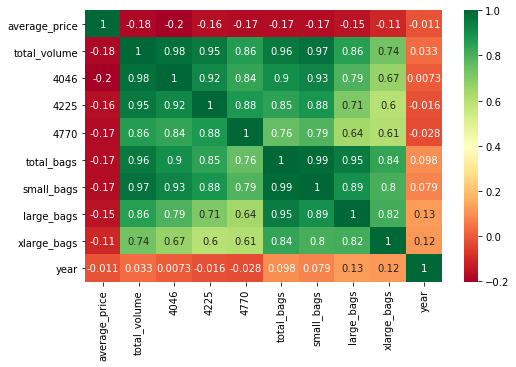

In [105]:
#Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [106]:
#From the heatmap above I can tell the date column is not needed
del df['date']

In [107]:
#From the heatmap above I can tell the 'type', 'geography' and 'date' columns are not included so they need to be converted
#or deleted.
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df1.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,2


In [108]:
#Check again... the features of the training set by seeing the correlations to each column
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915
year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000


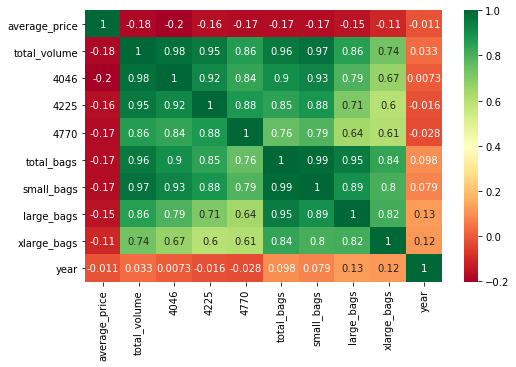

In [109]:
#Check again... Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [130]:
# Drop the geography columns that will create more noise in the training model.
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Houston'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Tampa'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Las Vegas'].index, inplace=True)
df.head(20)

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
5,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,0,2015,2
6,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1,2015,3
7,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,0,2015,3
8,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,1,2015,4
9,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,0,2015,4


In [131]:
# Change the 'date' column dtype to a float for the ml model
#df['date'].astype()

In [132]:
#train the data by putting the average_price in the y axis and all other columns in the x axis
#X=df.drop('average_price',1)
#y=df['average_price']
X=df.drop('geography',1)
y=df['geography']

In [133]:
# print the shape of an 80/20 train test split over the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (23905, 11) (23905,)


In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [135]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (19124, 11) (19124,)
shape of X and y (test) : (4781, 11) (4781,)


In [136]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])

In [137]:
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30010,2.02,8478.00,1536.00,1468.00,0.00,5473.00,3373.00,2100.00,0.00,0,2020,40
30011,1.31,117231.76,12121.98,47634.53,941.62,56533.63,44340.34,10544.39,1648.90,1,2020,41
30012,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,0,2020,41
30019,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,1,2020,42


In [138]:
# Determine which columns ar not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [139]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [140]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (19124, 11)
shape of X (test) : (4781, 11)


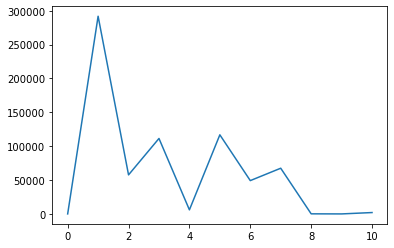

In [141]:
#Scale and Normalize the data
plt.plot(X_train[0])

In [142]:
scaler=StandardScaler()

In [143]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [144]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [145]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.936810,-0.261444,-0.224300,-0.420602,-0.327035,-0.035047,0.000987,-0.088442,-0.165868,0.998433,1.768177
1,-1.681305,-0.514384,-0.423322,-0.466037,-0.331125,-0.441922,-0.445520,-0.278626,-0.166154,-1.001570,-0.770220
2,-0.911138,-0.211148,-0.409936,0.052296,0.130599,-0.223954,-0.142174,-0.346298,-0.110230,0.998433,-1.404819
3,-0.397693,-0.448845,-0.428232,-0.413826,-0.331299,-0.324298,-0.441776,0.090126,-0.166154,-1.001570,-0.135620
4,0.372474,-0.486986,-0.345317,-0.423720,-0.331358,-0.480320,-0.445584,-0.401904,-0.166154,-1.001570,-1.404819


In [146]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [147]:
actr=[]
acts=[]
lstr=[]
lsts=[]

In [148]:
#Create a RandomForest pipeline
rf = RandomForestRegressor(random_state=0)

In [149]:
rf.fit(X_train,y_train)
y_tr1=rf.predict(X_train)
y_pr=rf.predict(X_test)

print('train data accuracy :',rf.score(X_train,y_train))
print('test data accuracy :',rf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9715476921767028
test data accuracy : 0.8103049037276684
loss of train data : 4.371843934323364
loss of test data : 29.439207111482954


In [150]:
actr.append(rf.score(X_train,y_train))
acts.append(rf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [151]:
#Evaluation
model = ['Random Forest']

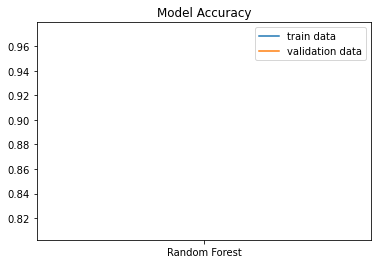

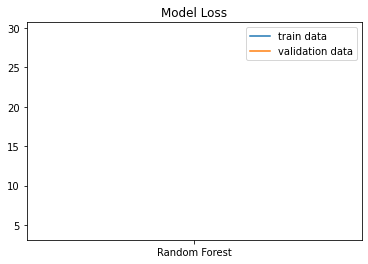

In [152]:
plt.title('Model Accuracy')
plt.plot(model,actr,label='train data')
plt.plot(model,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(model,lstr,label='train data')
plt.plot(model,lsts,label='validation data')
plt.legend()
plt.show()